# EPSY 5122: Programming for Social Science Researchers
## Assignment 11
### Due Wednesday, December 1 by 2:30pm

#### Problem 0

If you've made it to this document, you likely already did Problem 0 from the readme.  But just in case, here it is again!

a) Let's watch some videos! I recommend all the videos in this series (for future learning), but we will just focus on two now. Watch the first half of this video (https://www.youtube.com/watch?v=_NrSWLQsDL4&list=PLRqwX-V7Uu6ZF9C0YMKuns9sLDzK6zoiV&index=3) -- just the part about forking, you can ignore pull requests!  Then watch this video:
https://www.youtube.com/watch?v=yXT1ElMEkW8&list=PLRqwX-V7Uu6ZF9C0YMKuns9sLDzK6zoiV&index=6 (you don't have to do the terminal git commands, you can use the clone strategy we used in class)

b) Using what you learned in 0a, **fork** my GitHub repository (remote repo) to your own account, then **clone** to your hard drive (local repo) using GitKraken (or use the command-line if you want the extra challenge).  After finishing EACH problem below, make sure to STAGE and COMMIT with a comment (e.g., "Just finished Part 1! Git is fun!" or whatever).  Then PUSH back to GitHub.

###### Note on privacy!

By default, GitHub repos are public (promoting open source sharing of code), but of course you are more than welcome to make your code for this assignment private, as is your right!  Unfortunately, it's a little bit complicated because GitKraken recently made a change that the free version of their software doesn't allow for private repo access, and you need the paid version.  So here are 3 ways to do this privately:

1) GitKraken partners with GitHub to provide a free pack of resources (including the pro version of GitKraken) for *students*.  That's you!  So you can sign up here *only if you want to do this*: https://education.github.com/pack?utm_source=github+gitkraken

2) Just keep your GitHub repo public while you're working on this project.  Use free GitKraken.  Then switch the GitHub repo to Private only when you're done using GitKraken to push to GitHub.

3) Keep the repo private and use the terminal git commands in the YouTube video for Problem 0a.

To make the repo private:
On your GitHub repo, go to Settings > Manage Access > Manage (under Public Repository) > Change Visibility.  Then add me (jkbye) as a 'collaborator' so I can see it: Settings > Manage Access > Invite a Collaborator (green button) > add 'jkbye'.

#### Problem 1

Now let's get to Jupyter!

a) Import any helpful libraries in this Jupyter Notebook.

b) Load the *MA_Public_Schools_2017.csv* file as a pandas data frame.  Note: these data are from Kaggle: https://www.kaggle.com/ndalziel/massachusetts-public-schools-data and I have already removed a lot of columns.

c) Adapt the example code in the chunk below to replace all spaces in column names with underscores. This is good practice in order to not cause problems with functions that don't allow spaces in variable names (e.g., **smf.ols**).

d) Adapt the code from 1c to replace "%" sign with "Perc", because it is also good practice not to start column names with symbols.

e) Find the descriptives for numeric columns.

f) Commit your changes and push to GitHub!

In [36]:
# Problem 1 code here (can split into multiple code chunks if you want)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

ma_school_data = pd.read_csv("C:\\Users\\brice\\OneDrive\\Python\\f21_pfssr_assignment11\\In_Data\\MA_Public_Schools_2017.csv")

# starter code for 1c -- replace school_data w/ your dataframe name
ma_school_data.columns = ma_school_data.columns.str.replace('%', 'Perc') # notice this replaces the 1st argument w/ the 2nd

print(ma_school_data)
print(ma_school_data.describe().transpose())


      School Code                                        School Name  \
0           10505                                      Abington High   
1           10003                     Beaver Brook Elementary School   
2           10002                           Center Elementary School   
3           10405                               Frolio Middle School   
4           10015                        Woodsdale Elementary School   
...           ...                                                ...   
1856     35060505     Pioneer Charter School of Science II (PCSS-II)   
1857     35100205             Springfield Preparatory Charter School   
1858     39020900  TEC Connections Academy Commonwealth Virtual S...   
1859     35050405            UP Academy Charter School of Dorchester   
1860     35120305           UP Academy Charter School of Springfield   

         School Type          Town State  \
0      Public School      Abington    MA   
1      Public School      Abington    MA   
2  

#### Problem 2

a) Remove the District Code column.

b) Create a new column called "TOTAL_Enrollment" that is the sum of all columns that end in "Enrollment".

c) Compute the mean of "TOTAL_Enrollment" for each District. (Hint: groupby)

d) Commit your changes and push to GitHub!

In [22]:
# Problem 2 code here (can split into multiple code chunks if you want)

ma_school_data_2 = ma_school_data.drop(['District Code'], axis = 1)

ma_school_data_2['TOTAL_Enrollment'] = ma_school_data_2.filter(like = 'Enrollment').sum(axis = 1)

print(ma_school_data_2.groupby('District Name').mean()['TOTAL_Enrollment'])

District Name
Abby Kelley Foster Charter Public (District)            1425.000000
Abington                                                 383.200000
Academy Of the Pacific Rim Charter Public (District)     527.000000
Acton-Boxborough                                         620.888889
Acushnet                                                 477.500000
                                                           ...     
Winthrop                                                 492.750000
Woburn                                                   420.727273
Worcester                                                566.200000
Worthington                                               60.000000
Wrentham                                                 515.500000
Name: TOTAL_Enrollment, Length: 410, dtype: float64


#### Problem 3

a) Visualize each bivariate relationship among Average_Class_Size, Average_Salary, Perc_Economically_Disadvantaged, and Perc_English_Language_Learner.  Use the Seaborn function **pairplot**.  The argument to `pairplot` should be `school_data[['Average_Class_Size', 'Average_Salary', 'Perc_Economically_Disadvantaged', 'Perc_English_Language_Learner']]`, which will just pull those columns out from the full data frame.

b) Describe what you see from the plots.

c) Based on your observations from 3b, and as a completely post-hoc, exploratory analysis, choose one of the 4 measures from 3a to be an outcome variable, and a second measure to be a predictor variable.  Then run a linear regression, print the *summary*, and write a sentence interpreting the results (does not need to be detailed, just practice retrieving the relevant info on predictor significance, etc.)

d) Commit your changes and push to GitHub!

                                      OLS Regression Results                                      
Dep. Variable:     Perc English Language Learner   R-squared (uncentered):                   0.587
Model:                                       OLS   Adj. R-squared (uncentered):              0.587
Method:                            Least Squares   F-statistic:                              2474.
Date:                           Wed, 01 Dec 2021   Prob (F-statistic):                        0.00
Time:                                   11:16:02   Log-Likelihood:                         -6550.9
No. Observations:                           1741   AIC:                                  1.310e+04
Df Residuals:                               1740   BIC:                                  1.311e+04
Df Model:                                      1                                                  
Covariance Type:                       nonrobust                                                  
          

<Figure size 432x288 with 0 Axes>

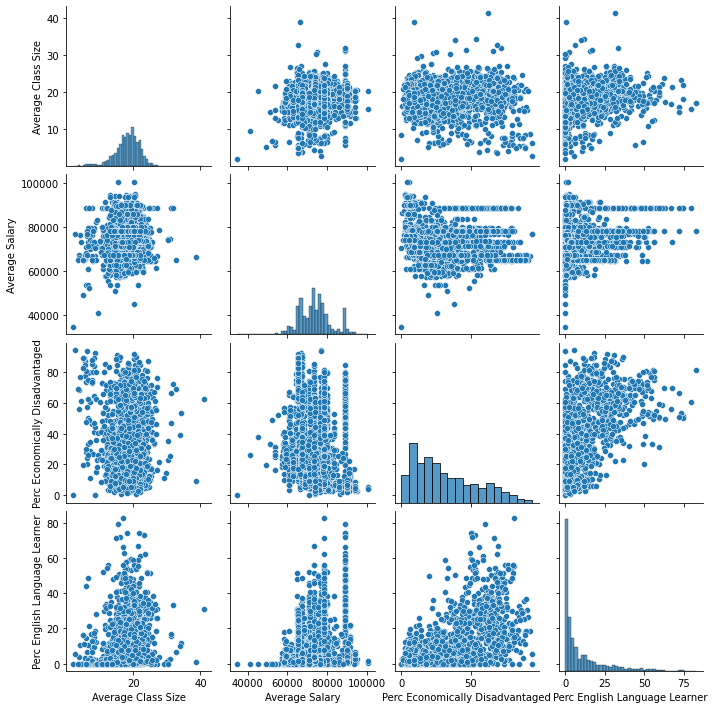

In [55]:
# Problem 3 code here (can split into multiple code chunks if you want)

plt.pyplot.clf()
sns.pairplot(data = ma_school_data_2, vars = ['Average Class Size', 'Average Salary', 'Perc Economically Disadvantaged', 'Perc English Language Learner'])

# 3b: By using the 'vars' specification, all variables listed have an opportunity to be an x and y-axis on the pairplots.
# Plots with the same x and y-axis show the distribution of those variables (ex. the average class size has a normal distribution)
# All other correlations seem weak, but it's difficult to know without computing for r.

# 3c: x = Perc Economically Disadvantaged, y = Perc English Language Learner
import scipy.stats as stats
import statsmodels.api as sm

ma_school_full = ma_school_data_2.dropna()
y = ma_school_full[['Perc English Language Learner']]
x1 = ma_school_full[['Perc Economically Disadvantaged']]
reg = sm.OLS(y, x).fit()
print(reg.summary())

# As the percentage of economically disadvntaged increases by 1%, the percentage of English language learners increases by .32%.
# This hypothesis of a non-zero correlation is statistically significant (p < 0.05)

#### Problem 4

a) Create a new linear regression model that takes the model from 3c and adds both of the remaining variables from 3a as additional predictor variables.  To do this, the formula interface would look like `"outcome_name ~ predictor1_name + predictor2_name + predictor3_name"`

b) Print the summary from 4a, and write a short interpretation of the results, especially comparing it to Problem 3c.  

c) Add School_Type as another predictor to your model.  Interpret the new predictor in your output.  How is it different from the other predictors?

d) Commit your changes and push to GitHub!

In [77]:
# Problem 4 code here (can split into multiple code chunks if you want)

x2 = ma_school_full[['Average Class Size', 'Average Salary', 'Perc Economically Disadvantaged']]
reg2 = sm.OLS(y,x2).fit()
print(reg2.summary())

# 4b: Perc Economically Disadvantaged is the only predictor with a p-value < 0.05.  This is the only statistically significant predictor in the multiple regression model.
# Including the other predictor variable impacts the Perc Economically Disadvantaged coefficient (.3221 in single regression to .3321 in multiple regression)

print(pd.unique(ma_school_full['School Type']))
ma_school_full[['School Type Dummy']] = ma_school_full[['School Type']].replace('Public School', 1)
print(ma_school_full['School Type Dummy'])

x3 = ma_school_full[['Average Class Size', 'Average Salary', 'Perc Economically Disadvantaged', 'School Type Dummy']]
reg3 = sm.OLS(y,x3).fit()
print(reg3.summary())

# 4c: School Type is a categorical variable; therefore, it must be transformed into a dummy variable (1 = if condition is satisfied, 0 = if not)
# Since public school was the only school type present when removing missing data, the string "Public School" was replaced with 1 for regression analysis.
# Including school type into the model made all predictors statistically significant (p < 0.05).

                                      OLS Regression Results                                      
Dep. Variable:     Perc English Language Learner   R-squared (uncentered):                   0.588
Model:                                       OLS   Adj. R-squared (uncentered):              0.587
Method:                            Least Squares   F-statistic:                              825.2
Date:                           Wed, 01 Dec 2021   Prob (F-statistic):                        0.00
Time:                                   12:18:43   Log-Likelihood:                         -6549.9
No. Observations:                           1741   AIC:                                  1.311e+04
Df Residuals:                               1738   BIC:                                  1.312e+04
Df Model:                                      3                                                  
Covariance Type:                       nonrobust                                                  
          

C:\Users\brice\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


#### Problem 5

a) Save this Jupyter notebook as an HTML file (File > Download As > HTML) into your local repository (this folder). By default, Jupyter may put your HTML file in your default Downloads folder (wherever that is) -- if that happens, just manually move the file into this repo folder.

b) Stage, commit, and push all changes to your GitHub repository.

c) Submit a link to your repository as your submission for the assignment on Canvas. Remember the note from Problem 0: you can keep your repo private and add me as a collaborator.